<a href="https://colab.research.google.com/github/ValentinoMalakianno/Pembelajaran_Mesin2023/blob/main/Jobsheet9_MachineLearning_ValentinoMalakianno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Valentino Malakianno**
### **3G**
### **2141720099**

#####**Praktikum 1**

##### Import Library

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


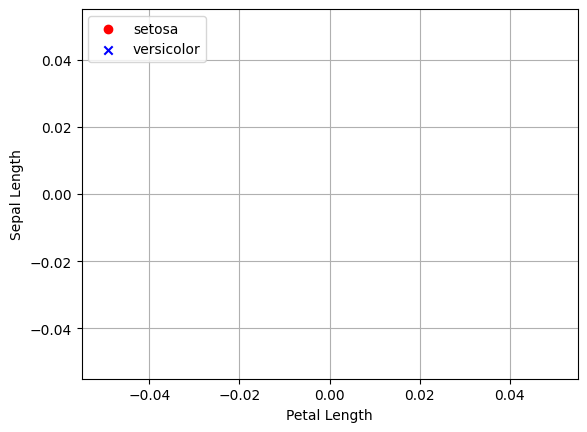

In [82]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#####Membuat Kelas Perceptron

In [83]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#####Pilih Data dan Encoding Label

In [84]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

#####Fitting Model

In [85]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

TypeError: ignored

#####Visualisasi Nilai Error Per Epoch

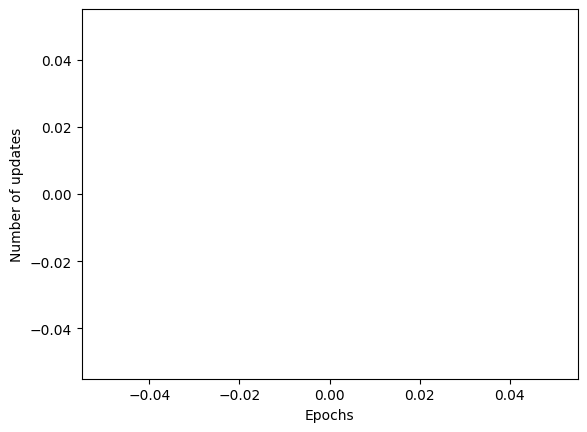

In [86]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#####Visualiasasi Decision Boundary

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

In [ ]:
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

TypeError: ignored

#####**Praktikum 2**

##### Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

#####Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

#####Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



#####**Praktikum 3**

#####Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

#####Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

#####Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

#####Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


#####**Praktikum 4**

#####Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


#####Load Data

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


#####Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#####Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


#####Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#####Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#####Membuat Model ANN

#####Inisiasi Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

#####Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#####Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#####Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#####Training Model

#####Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#####Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.7017 - accuracy: 0.5809
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5211 - accuracy: 0.8021
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4511 - accuracy: 0.8115
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4280 - accuracy: 0.8158
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8216
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8270
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8300
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8375
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8453
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3616 - accura

#####Membuat Prediksi

#####Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 187ms/step
[[False]]


#####Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#####Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1513   82]
 [ 196  209]]


0.861

#####**TUGAS PRAKTIKUM**

#####Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mnist = datasets.fetch_openml("mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Melihat dimensi data
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel
print("Jumlah kelas:", len(mnist.target.unique()))

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


#####Eksplorasi Dataset

Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


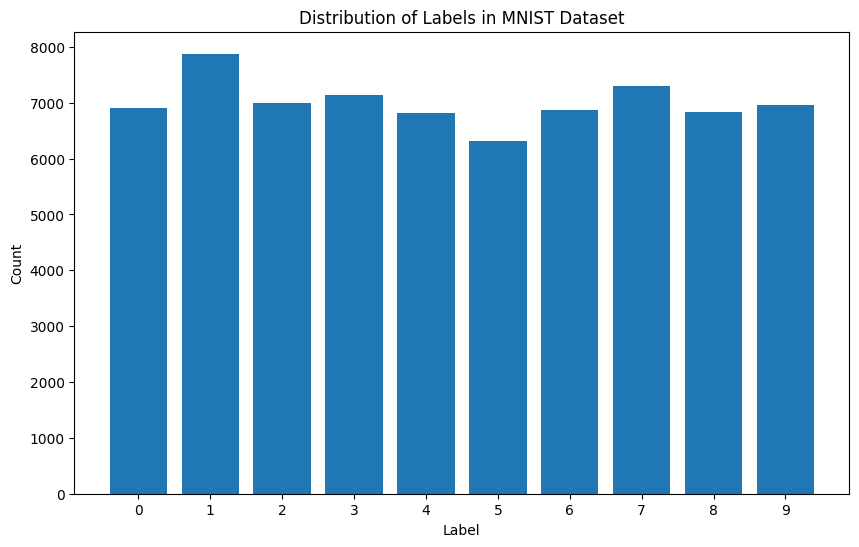

In [ ]:
# 1. Eksplorasi Dataset
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')

plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [ ]:
# Mengambil data dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

In [ ]:
X.shape

(70000, 784)

In [ ]:
scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [ ]:
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#####Ekstraksi Fitur dengan PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
n_components = 200
pca = RandomizedPCA(n_components =n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scalling)

In [ ]:
# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#####Flattening

In [ ]:
# Flattening data setelah PCA
X_flattened = X_pca.reshape(X_pca.shape[0], -1)

#####Membuat Model ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Membuat model ANN
model = keras.Sequential([
    layers.Flatten(input_shape=(n_components,)),  # Input layer dengan 150 fitur
    layers.Dense(128, activation='relu'),  # Hidden layer dengan 128 neuron dan fungsi aktivasi ReLU
    layers.Dense(64, activation='relu'),  # Hidden layer dengan 64 neuron dan fungsi aktivasi ReLU
    layers.Dense(10, activation='softmax')  # Output layer dengan 10 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
])

# Menampilkan ringkasan model
model.summary()



NameError: ignored

#####Training Model

#####Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


NameError: ignored

#####Fitting Model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

NameError: ignored